# Task 1



Create a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information. You
can use techniques like TF-IDF or word embeddings with classifiers
such as Naive Bayes, Logistic Regression, or Support Vector
Machines.


## so the first thing that we gonna do in this project is improting library then data 

In [141]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec

In [149]:
test = pd.read_csv("test_data.txt", sep=':::', names=['ID', 'TITLE', 'DESCRIPTION'], engine='python')
display(test.head())
print(test.shape)

train = pd.read_csv("train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
display(train.head())
print(train.shape)

test_solution = pd.read_csv("test_data_solution.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
display(test_solution.head())
print(test_solution.shape)


,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


(54200, 3)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


(54200, 4)


#  moving  to performing some data visualization with a two-way : horizontal bar plot and a pie chart.

## 1.horizontal bar

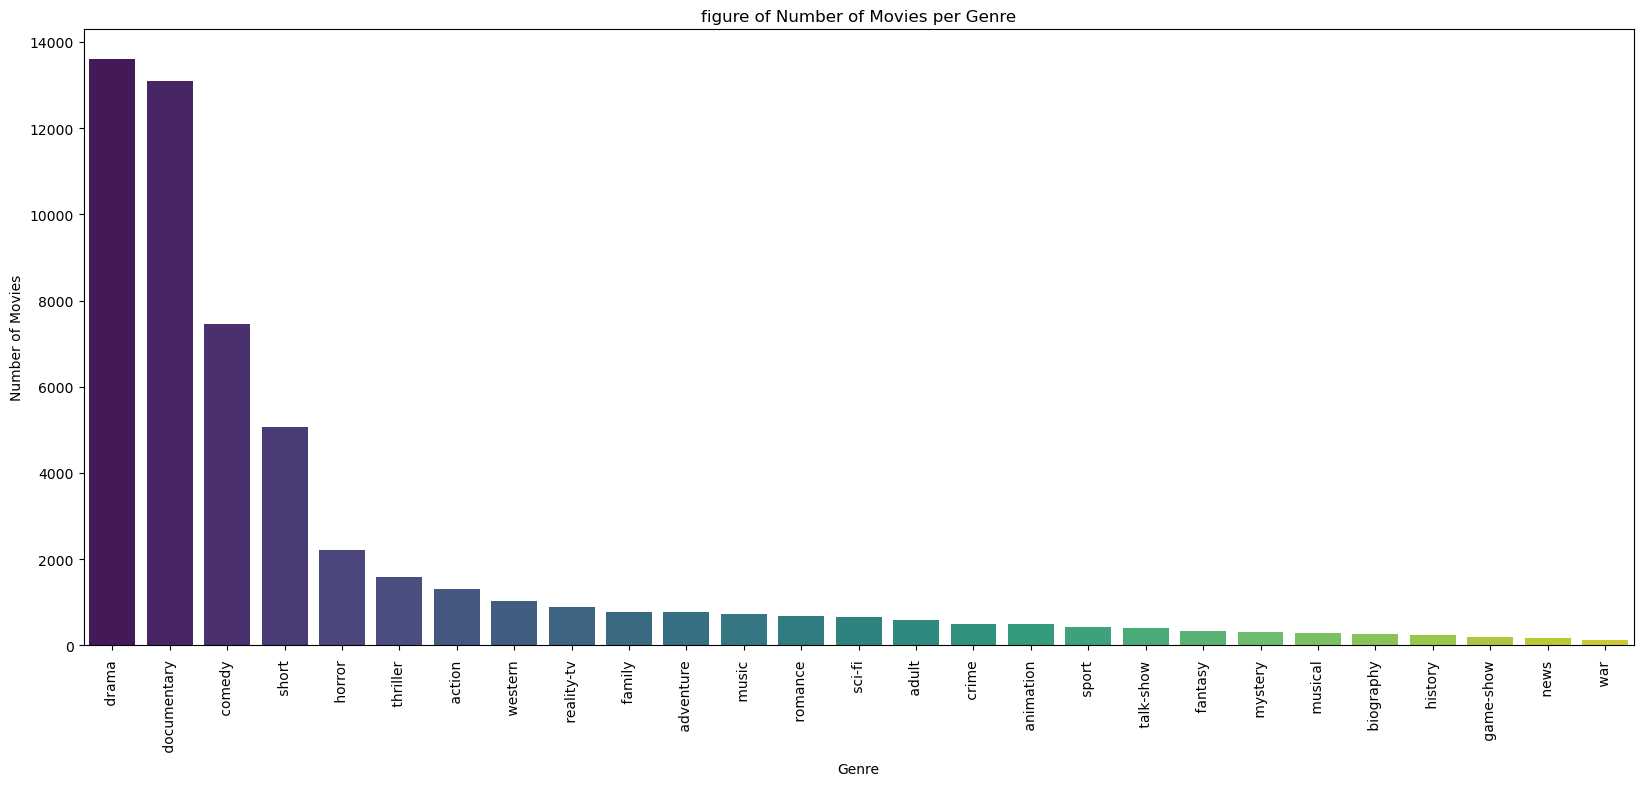

In [103]:
plt.figure(figsize=(20,8))
sns.countplot(x=train['GENRE'], order=train['GENRE'].value_counts().index, palette='viridis')
plt.title('figure of Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

## 2.pie chart


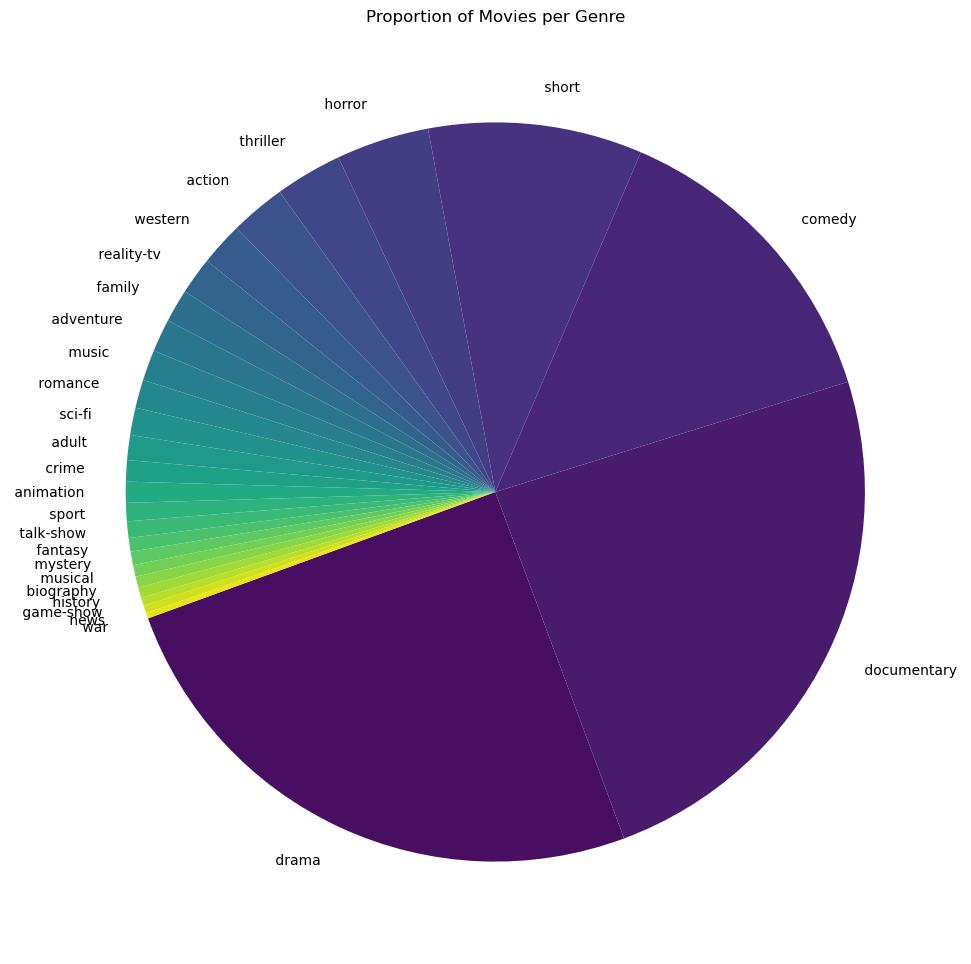

In [105]:
plt.figure(figsize=(12,12))
train['GENRE'].value_counts().plot.pie( startangle=200, colors=sns.color_palette('viridis', n_colors=len(train['GENRE'].unique())))
plt.title('Proportion of Movies per Genre')
plt.ylabel('')
plt.show()

### top 5 genre


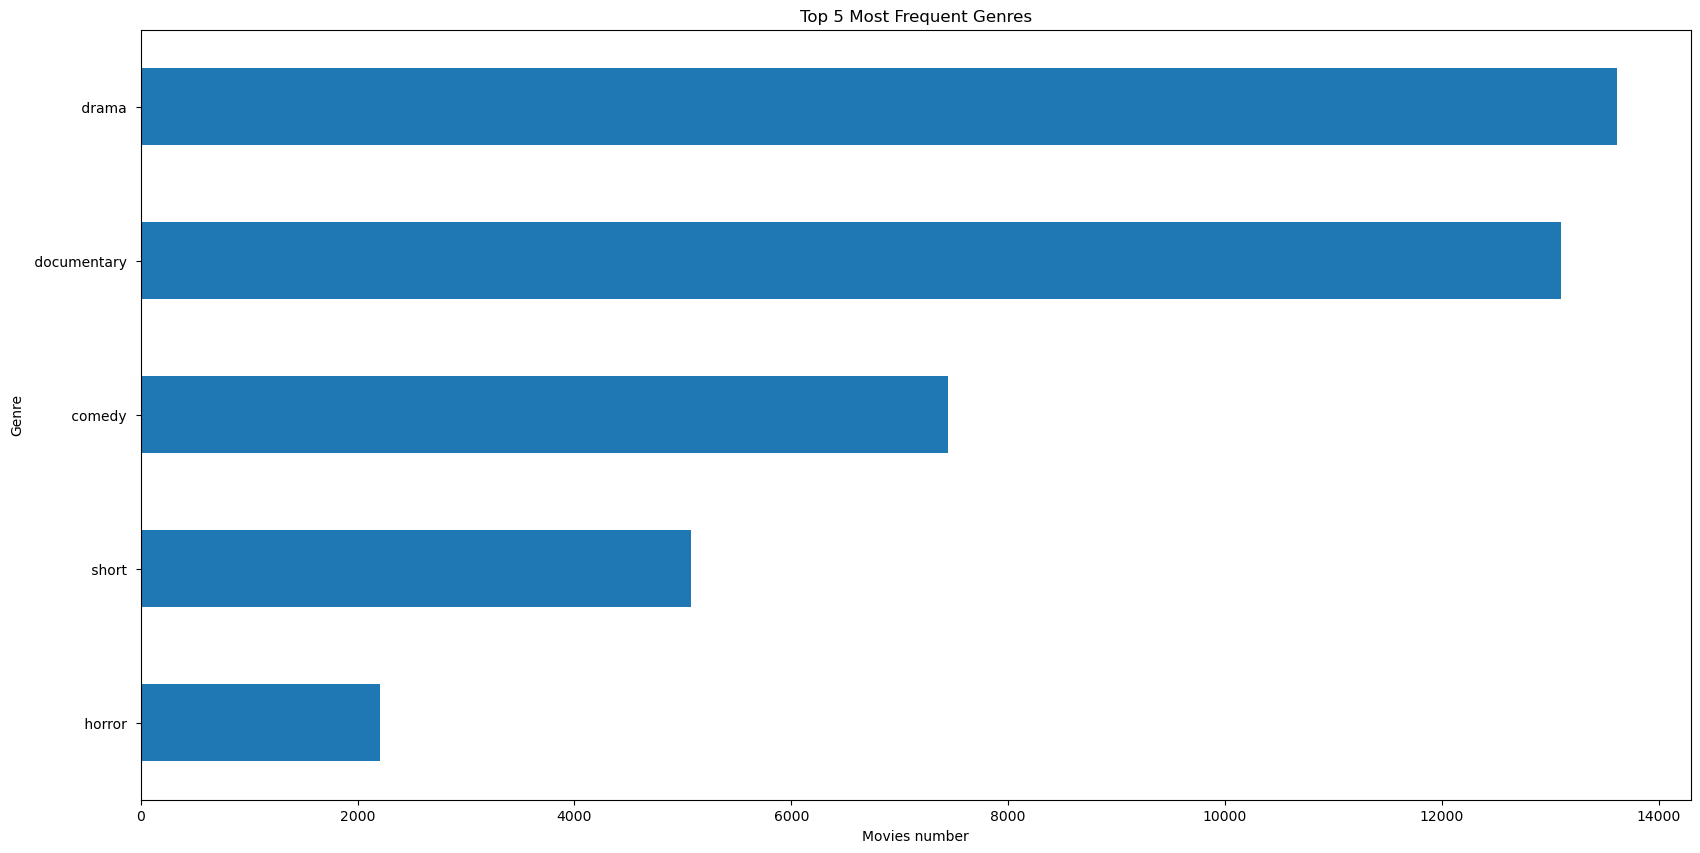

In [107]:
most_genres_watching = train['GENRE'].value_counts().head(5)
plt.figure(figsize=(20, 10))
most_genres_watching.plot(kind='barh')
plt.title('Top 5 Most Frequent Genres')
plt.xlabel('Movies number')
plt.ylabel('Genre')

plt.gca().invert_yaxis()  
plt.show()

# now training the data

In [155]:
train['DESCRIPTION'].fillna("", inplace=True)
test['DESCRIPTION'].fillna("", inplace=True)

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train['DESCRIPTION'])
X_test = t_v.transform(test['DESCRIPTION'])
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train['GENRE'])
y_test = label_encoder.transform(test_solution['GENRE'])  # Ensure 'GENRE' exists in test_solution

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)
y_val_pred = clf.predict(X_val)

print(" Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(" Validation Classification Report:\n", classification_report(y_val, y_val_pred))
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

 Validation Accuracy: 0.5836945494789265
 Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
    

In [153]:

corpus = train['DESCRIPTION'].apply(lambda x: x.split())
wv = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0. 
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords > 0:
        feature_vector = np.divide(feature_vector, nwords)
    
    return feature_vector


In [163]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)
#exmple :    
sample_descr_for_movie = "A movie where police catch the criminal and shoot him"
print(predict_movie(sample_descr_for_movie))



[' action ']
